# Análise Exploratória (EDA)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import itertools
import locale

In [43]:
df_sus = pd.read_csv('../data/opendatasus/opendatasus.csv', encoding='latin1', sep=';', low_memory=False)
df_estacoes = pd.read_csv('../data/estacoes_monitorar/estacoes.csv', encoding='utf_8_sig', sep=';', low_memory=False)
df_medidas_jan_mar = pd.read_csv('../data/medidas_monitorar/medidas_jan_mar.csv', encoding='latin1', sep=';', low_memory=False, decimal='.')
df_medidas_abr_jun = pd.read_csv('../data/medidas_monitorar/medidas_abr_jun.csv', encoding='latin1', sep=';', low_memory=False, decimal='.')
df_medidas_jul_nov = pd.read_csv('../data/medidas_monitorar/medidas_jul_nov.csv', encoding='latin1', sep=';', low_memory=False, decimal='.')

In [44]:
# Useful columns 
df_sus = df_sus[['DT_SIN_PRI', 'CS_SEXO', 'DT_NASC', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'CO_MUN_RES', 
                'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA']]

df_estacoes = df_estacoes[['Código IBGE do Município', 'Nome do Município', 'Estado', 'ID da Estação', 'Nome da Estação', 'Latitude', 'Longitude']]

df_medidas = pd.concat([df_medidas_jan_mar,df_medidas_abr_jun, df_medidas_jul_nov])

df_medidas = df_medidas[['Nome do Município', 'Estado', 'Nome da Estação', 'Item_monitorado', 'Sigla', 'Concentracao', 'iqar', 'Data']]

In [23]:
df_medidas.isnull().sum()

Nome do Município          0
Estado                     0
Nome da Estação            0
Item_monitorado            0
Sigla                      0
Concentracao               0
iqar                 1045240
Data                       0
dtype: int64

In [ ]:
# Renaming columns datasus
df_sus.columns = df_sus.columns.str.lower()

In [24]:
# Renaming columns df_estacoes
new_names = ['codigo_mun', 'nome_mun', 'uf', 'id_estacao', 'nome_estacao', 'latitude', 'longitude']
dict_names = {}

for i, j in zip(df_estacoes.columns, new_names):
    dict_names[i] = j

df_estacoes.rename(columns=dict_names, inplace=True)

In [46]:
# Renaming column df_medidas
new_names = ['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla', 'concentracao', 'iqar', 'data']
dict_names = {}

for i, j in zip(df_medidas.columns, new_names):
    dict_names[i] = j

df_medidas.rename(columns=dict_names, inplace=True)

### DFS:

* df_sus: Dados do OpenDataSUS apenas com as colunas que vamos utilizar para a análise
    - Colunas:
        - Data dos primeiros sintomas (dt_sin_pri)
        - Sexo (Masculino ou Femino) (cs_sexo)
            - 1: Masculino
            - 2: Feminino
            - 3: Ignorado
        - Data de Nascimento (dt_nasc)
        - Raca (cs_raca)
            - 1: Branca
            - 2: Preta
            - 3: Amarela
            - 4: Parda
            - 5: Indígena
            - 9: Ignorado 
        - Nivel de escolaridade (cs_escol_n)
            - 0: Sem Escolaridade/Analfabeto
            - 1: Fundamental 1º ciclo (1ª a 5ª série)
            - 2: Fundamental 2º ciclo (6ª a 9ª série)
            - 3: Médio (1º ao 3º ano)
            - 4: Superior
            - 5: Não se aplica
            - 9: Ignorado
        - UF de moradia (sg_uf)
        - Nome do município de residência (id_mn_resi)
        - ID IBGE do município (co_mun_res)
        - Classificação final do caso (classi_fin)
            - 1: SRAG por Influenza
            - 2: SRAG por outro vírus resporatório
            - 3: SRAG por outro agente etiológico
            - 4: SRAG não especificado
            - 5: SRAG por covid-19
        - Criterio adotado para evolução do caso (criterio)
            - 1: Laboratorial
            - 2: Clínico Epidemiológico
            - 3: Clínico
            - 4: Clínico imagem
        - Evolução do caso, se deu alta ou óbito (evolucao)
            - 1: Cura
            - 2: Óbito
            - 3: Óbito por outras causas
            - 9: Ignorado
        - Data da evolucao (dt_evolucao)

* df_medidas: medidas do MonitorAr

* df_estacoes: dados sobre as estacoes
    - Código do munícipio de acordo com IBGE (codigo_mun)
    - Nome do município (nome_mun)
    - Estado de localização (uf)
    - ID da estação (id_estacao)
    - Nome da estação (nome_estacao)
    - Latitude e longitude da localizacação (latitude e longitude)

In [221]:
# Veryfing null/na columns
sus_null_columns = df_sus.isna().sum()
sus_null_columns


dt_sin_pri         0
cs_sexo            0
dt_nasc         2139
cs_raca        43310
cs_escol_n    359611
sg_uf            113
id_mn_resi       113
co_mun_res       113
classi_fin     32862
criterio       55277
evolucao       76522
dt_evoluca    152891
dtype: int64

In [300]:
medidas_null_columns  = df_medidas.isnull().sum()
medidas_null_columns

nome_mun                 0
uf                       0
nome_estacao             0
item_monitorado          0
sigla                    0
concentracao             0
iqar               1045240
data                     0
dtype: int64

In [302]:
df_medidas['iqar'] = df_medidas['iqar'].str.replace('.', '').astype(float)

In [310]:
df_medidas = df_medidas[df_medidas['iqar'] >= 0]
df_medidas.head()

,nome_mun,uf,nome_estacao,item_monitorado,sigla,concentracao,iqar,data
0,Camaçari,BA,CÂMARA,Dióxido de Enxofre,SO2,0.891,3400.0,22/11/2022
1,Camaçari,BA,CÂMARA,Dióxido de Nitrogênio,NO2,5.670,5120.0,22/11/2022
5,Camaçari,BA,CÂMARA,Ozônio,O3,32.797,10520.0,22/11/2022
7,Dias d'Ávila,BA,COBRE,Dióxido de Enxofre,SO2,0.369,200.0,22/11/2022
8,Dias d'Ávila,BA,CONCÓRDIA,Dióxido de Enxofre,SO2,0.000,200.0,22/11/2022


In [308]:
df_medidas['sigla'].unique()

array(['SO2', 'NO2', 'O3', 'MP10', 'CO', 'MP2,5', 'PTS'], dtype=object)

In [304]:
df_medidas.columns

Index(['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla',
       'concentracao', 'iqar', 'data'],
      dtype='object')

In [306]:
# Agrupar por data, cidade e poluente, e calcular a média do iqar
df_medidas.groupby(['data', 'nome_mun', 'sigla'])['iqar'].mean()

data        nome_mun    sigla
01/07/2022  Americana   MP10     53130.434783
            Araraquara  MP10     41350.000000
                        O3       51333.333333
            Araçatuba   MP10     26705.882353
                        O3       34500.000000
                                     ...     
31/10/2022  Vitória     CO        1546.250000
                        MP10     17460.000000
                        NO2       2136.521739
                        O3       14752.500000
                        SO2       1960.461538
Name: iqar, Length: 16525, dtype: float64

In [ ]:
df_medidas.dropna(subset=['iqar'], inplace=True)
lista = df_medidas['iqar'].tolist()

inteiros = []
for string in lista:
    if isinstance(string, str):
        # Remove pontos (milhares) e substitui vírgula por ponto se for necessário
        string = string.replace('.', '').replace(',', '.')
    try:
        if float(string) >= 0:
            inteiros.append(float(string))
    except ValueError:
        print(f"Erro ao converter: {string}")

326000.0

In [224]:
estacoes_null_columns = df_estacoes.isnull().sum()
estacoes_null_columns

codigo_mun      0
nome_mun        0
uf              0
id_estacao      0
nome_estacao    0
latitude        0
longitude       0
dtype: int64

In [225]:
df_sus['dt_sin_pri'] = pd.to_datetime(df_sus['dt_sin_pri'])
df_sus['dt_nasc'] = pd.to_datetime(df_sus['dt_nasc'])

In [226]:
df_sus['idade'] = (df_sus['dt_sin_pri'] - df_sus['dt_nasc']).dt.days // 365

In [227]:
df_sus['idade'].isna().sum()

np.int64(2139)

In [228]:
df_sus.dropna(subset=['idade'], inplace=True)

In [229]:
df_sus['idade'].isna().sum()

np.int64(0)

In [230]:
df_sus['cs_sexo'].dropna()

0          F
1          F
2          M
3          M
4          F
          ..
1206915    F
1206916    M
1206917    M
1206918    M
1206919    F
Name: cs_sexo, Length: 1204781, dtype: object

In [231]:
df_sus['cs_sexo'].isnull().sum()

np.int64(0)

In [232]:
def faixa_etaria(idade):
    '''
        Função que recebe a idade e de acordo com isso, fornece em qual faixa etária o indivíduo se encaixa:
            Criança (0 -13 anos)
            Adolescente (13 - 17 anos)
            Adulto (18 - 64 anos)
            Idosos ( >= 65 anos)
    '''
    if idade >= 0 and idade < 13:
        return'crianca'
    elif idade >= 13 and idade < 18:
        return 'adolescente'
    elif idade >= 18 and idade < 65:
        return 'adulto'
    else:
        return 'idoso'

In [233]:
# Criando a coluna faixa etária para analisar
df_sus['faixa_etaria'] = df_sus['idade'].apply(faixa_etaria)

In [234]:
# Verificando se há valores nulos
df_sus['classi_fin'].isnull().sum()

np.int64(32789)

In [235]:
# Dropando valores nulos da classificação final
df_sus.dropna(subset=['classi_fin'], inplace=True)

In [236]:
# Transformando a classificação final do tipo string para inteiro
df_sus['classi_fin'] = df_sus['classi_fin'].astype(int)

In [237]:
# Filter only rows with classi_fin > 0
filtered_df = df_sus[df_sus['classi_fin'] > 0]

# Create the key by combining faixa_etaria and sexo
filtered_df['key'] = filtered_df['faixa_etaria'] + filtered_df['cs_sexo'].map({'M': 'masculino', 'F': 'feminino'})

# Count occurrences of each key
final_dict = filtered_df['key'].value_counts().to_dict()

In [238]:
final_dict

{'adultomasculino': 334365,
 'adultofeminino': 258905,
 'idosomasculino': 254525,
 'idosofeminino': 240841,
 'criancamasculino': 41159,
 'criancafeminino': 32446,
 'adolescentefeminino': 5239,
 'adolescentemasculino': 4227}

In [239]:

# Extrair faixas etárias únicas (ordenadas)
faixas_etarias = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))

# Inicializar arrays para homens e mulheres
men_bins = np.zeros(len(faixas_etarias))
women_bins = np.zeros(len(faixas_etarias))

# Preencher os arrays
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = -final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

# Layout do gráfico
layout = go.Layout(
    yaxis=go.layout.YAxis(title='Faixa Etária'),
    xaxis=go.layout.XAxis(
        range=[-max(men_bins)*1.1, max(men_bins)*1.1],  # Ajuste automático
        tickvals=[-1000, -700, -300, 0, 300, 700, 1000],  # Personalize conforme seus dados
        ticktext=['1000', '700', '300', '0', '300', '700', '1000'],
        title='Número de Casos'
    ),
    barmode='overlay',
    bargap=0.1,
    title='Pirâmide Etária de Casos (SUS)'
)

# Dados para o gráfico
data = [
    go.Bar(
        y=faixas_etarias,
        x=men_bins,
        orientation='h',
        name='Masculino',
        hoverinfo='x',
        marker=dict(color='powderblue')
    ),
    go.Bar(
        y=faixas_etarias,
        x=women_bins,
        orientation='h',
        name='Feminino',
        text=-1 * women_bins.astype('int'),  # Mostrar valores absolutos
        hoverinfo='text',
        marker=dict(color='seagreen')
    )
]

# Mostrar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [240]:
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

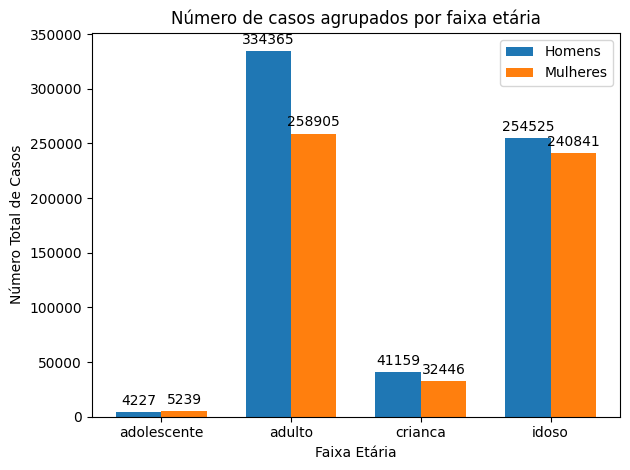

In [241]:
labels = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))
x = np.arange(len(men_bins))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_bins, width, label='Homens')
rects2 = ax.bar(x + width/2, women_bins, width, label='Mulheres')

ax.set_ylabel('Número Total de Casos')
ax.set_xlabel('Faixa Etária')
ax.set_title('Número de casos agrupados por faixa etária')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [242]:
df_sus['sg_uf'].unique()

array(['SP', 'RS', 'PR', 'GO', 'PE', 'SC', 'RJ', 'TO', 'MG', 'DF', 'AM',
       'ES', 'CE', 'BA', 'SE', 'MS', 'PA', 'AC', 'MT', 'PI', 'PB', 'RO',
       'RN', 'RR', nan, 'MA', 'AL', 'AP'], dtype=object)

In [243]:
def juntando_numero_casos_por_uf(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['sg_uf']

        result_dict[key] = result_dict.get(key, 0) + 1
    
    return result_dict

In [244]:
# Exclui linhas com uf null
df_sus.dropna(subset=['sg_uf'], inplace=True)

In [245]:
final_dict = juntando_numero_casos_por_uf(df_sus)

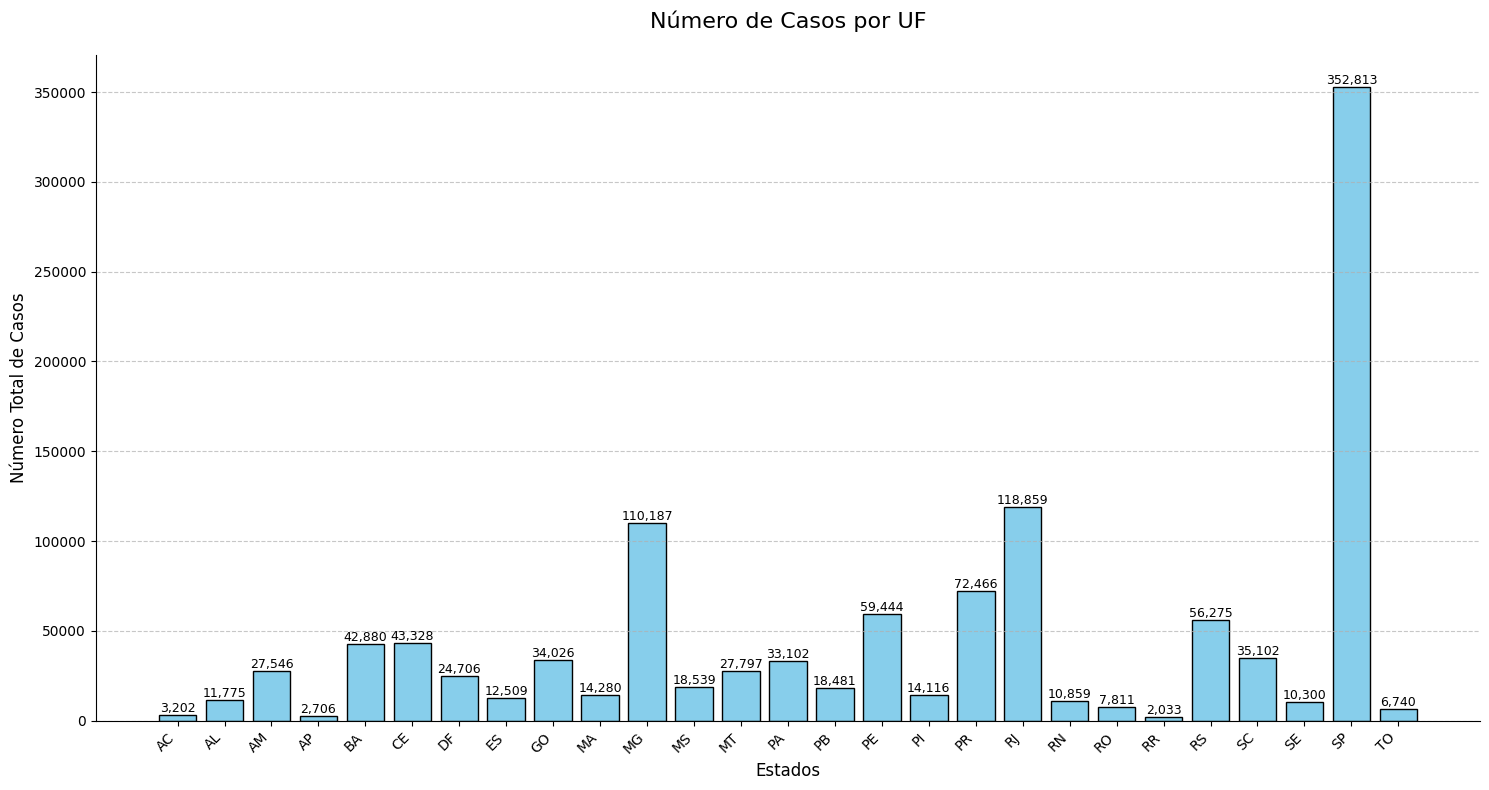

In [246]:
# Ordenar os estados e valores
labels = sorted(final_dict.keys())
values = [final_dict[uf] for uf in labels]

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Número de Casos por UF', fontsize=16, pad=20)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Número Total de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

In [247]:
# Evolução mensal dos casos
df_sus['mes'] = df_sus['dt_sin_pri'].dt.month_name(locale='pt_BR.utf8')

In [248]:
def juntanto_numero_casos_por_mes(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['mes']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [249]:
dict_mes = juntanto_numero_casos_por_mes(df_sus)

In [250]:
dict_mes

{'Dezembro': 134188,
 'Janeiro': 14663,
 'Abril': 105746,
 'Março': 40317,
 'Fevereiro': 3223,
 'Maio': 149673,
 'Julho': 151435,
 'Novembro': 114341,
 'Agosto': 127366,
 'Junho': 146991,
 'Outubro': 86720,
 'Setembro': 97219}

In [251]:
ordem_meses = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

# Ordena as chaves
chaves_ordenadas = sorted(
    dict_mes.keys(),
    key=lambda mes: ordem_meses.index(mes)
)

# Cria novo dicionário ordenado
dict_ordenado = {mes: dict_mes[mes] for mes in chaves_ordenadas}
# Saída: {'janeiro': 5, 'março': 10, 'agosto': 3, 'dezembro': 8}

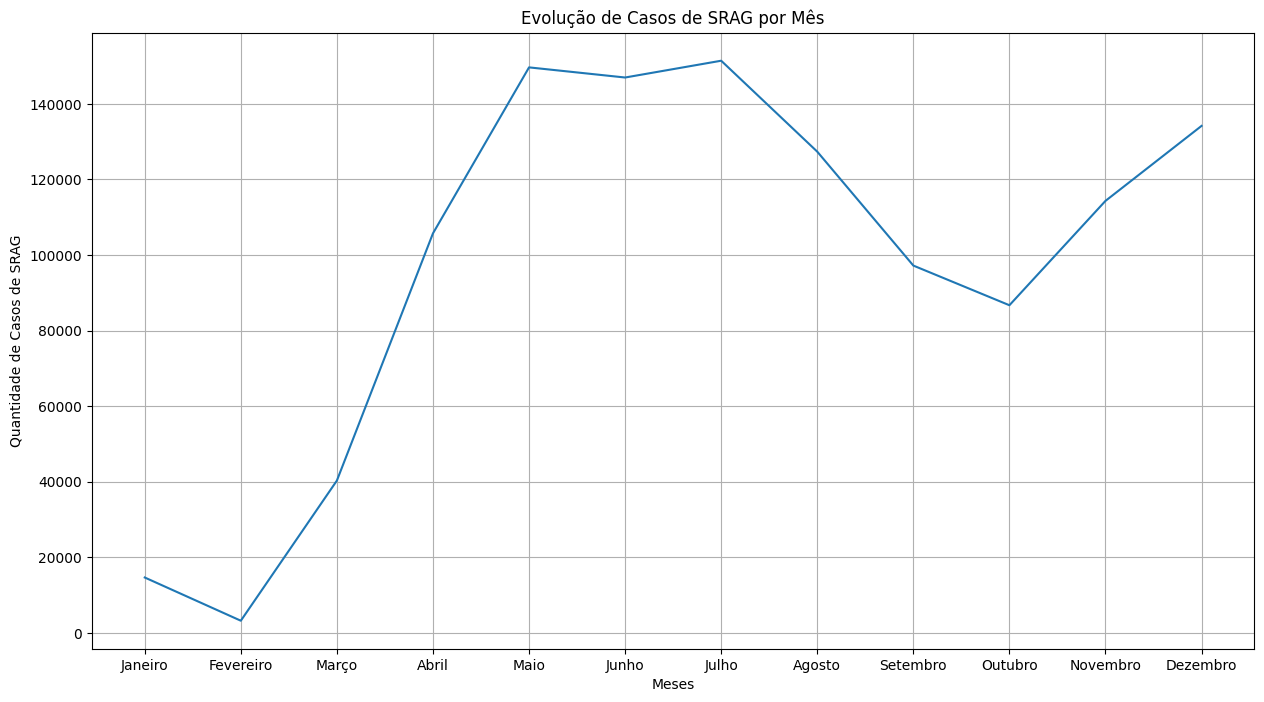

In [252]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dict_ordenado.keys(), dict_ordenado.values())

ax.set(xlabel='Meses', ylabel='Quantidade de Casos de SRAG',
       title='Evolução de Casos de SRAG por Mês')
ax.grid()
plt.show()

In [253]:
# Número de casos por doença
def juntando_numero_casos_por_doenca(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['classi_fin']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [254]:
dict_doenca = juntando_numero_casos_por_doenca(df_sus)

- 1: SRAG por Influenza
- 2: SRAG por outro vírus resporatório
- 3: SRAG por outro agente etiológico
- 4: SRAG não especificado
- 5: SRAG por covid-19

In [255]:
def renomear_chaves(dicionario, mapa_renomeacao):
    """
    Renomeia chaves de um dicionário.

    Args:
        dicionario: O dicionário cujas chaves serão renomeadas.
        mapa_renomeacao: Um dicionário que mapeia as chaves originais para as novas chaves.

    Returns:
        Um novo dicionário com as chaves renomeadas.
    """
    novo_dicionario = {}
    for chave_original, valor in dicionario.items():
        nova_chave = mapa_renomeacao.get(chave_original, chave_original)
        novo_dicionario[nova_chave] = valor
    return novo_dicionario

In [256]:
dict_doenca_ordenado = dict(sorted(dict_doenca.items()))

mapa_renomeacao = {1: 'SRAG Por Influenza',
                   2: 'SRAG por outro vírus respiratório',
                   3: 'SRAG por outro agente etiológico',
                   4: 'SRAG não especificado',
                   5: 'SRAG por covid-19'}
dict_doenca = renomear_chaves(dict_doenca_ordenado, mapa_renomeacao)

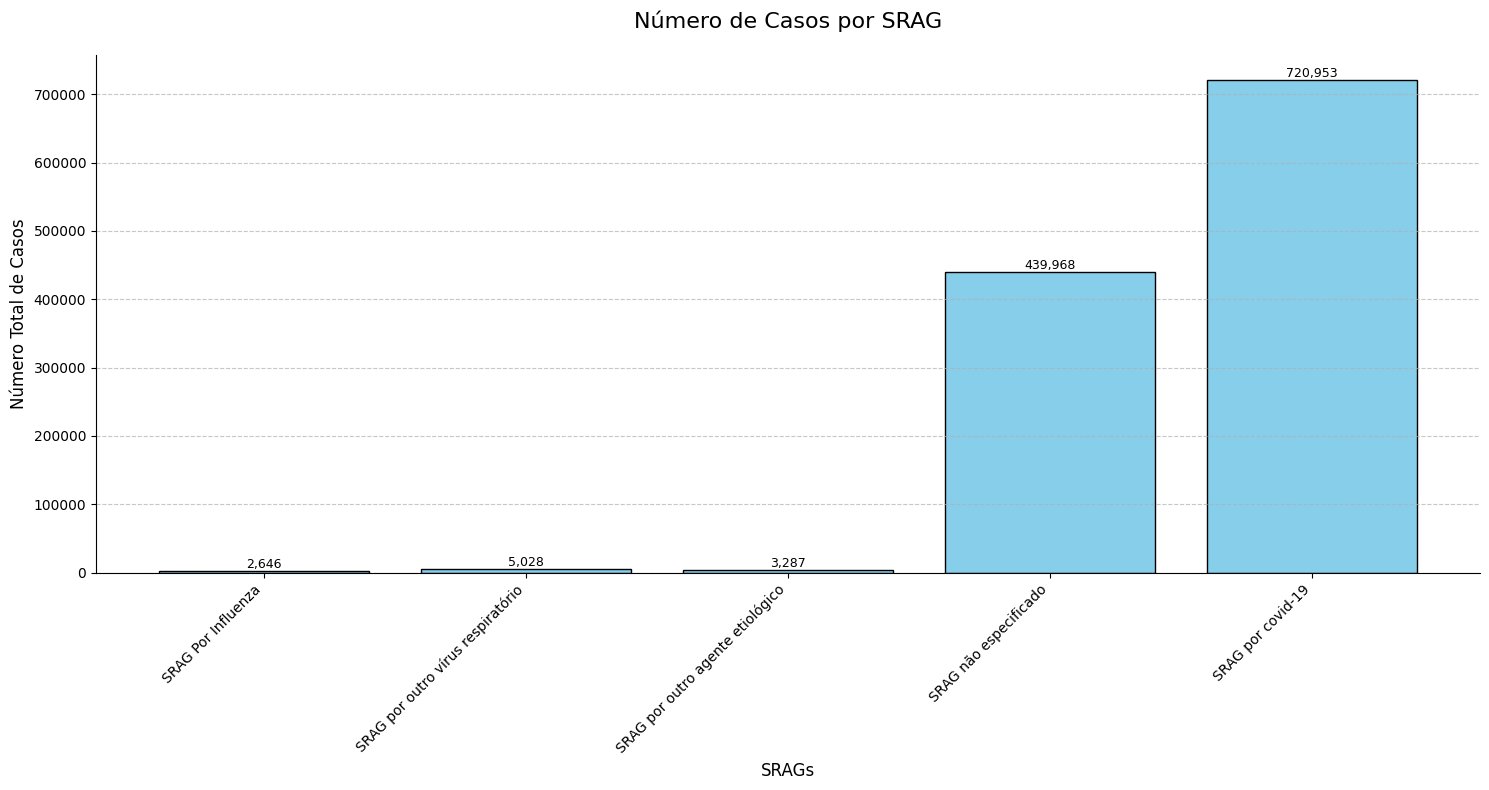

In [257]:
# Ordenar os estados e valores
labels = list(dict_doenca.keys())
values = list(dict_doenca.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Número de Casos por SRAG', fontsize=16, pad=20)
plt.xlabel('SRAGs', fontsize=12)
plt.ylabel('Número Total de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

### Análise sobre os dados de medidas

In [258]:
# Interligando os dados
# Vendo quais cidades tem em ambos os datasets

tamanho_max = 6

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].astype(str)

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].apply(lambda x: x[:tamanho_max])

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].astype(int)

In [259]:
df_medidas.columns

Index(['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla',
       'concentracao', 'iqar', 'Data'],
      dtype='object')

In [260]:
# Concentração total de todos os poluentes
def agrupando_por_poluente(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['sigla']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [261]:
dict_poluentes = agrupando_por_poluente(df_medidas)

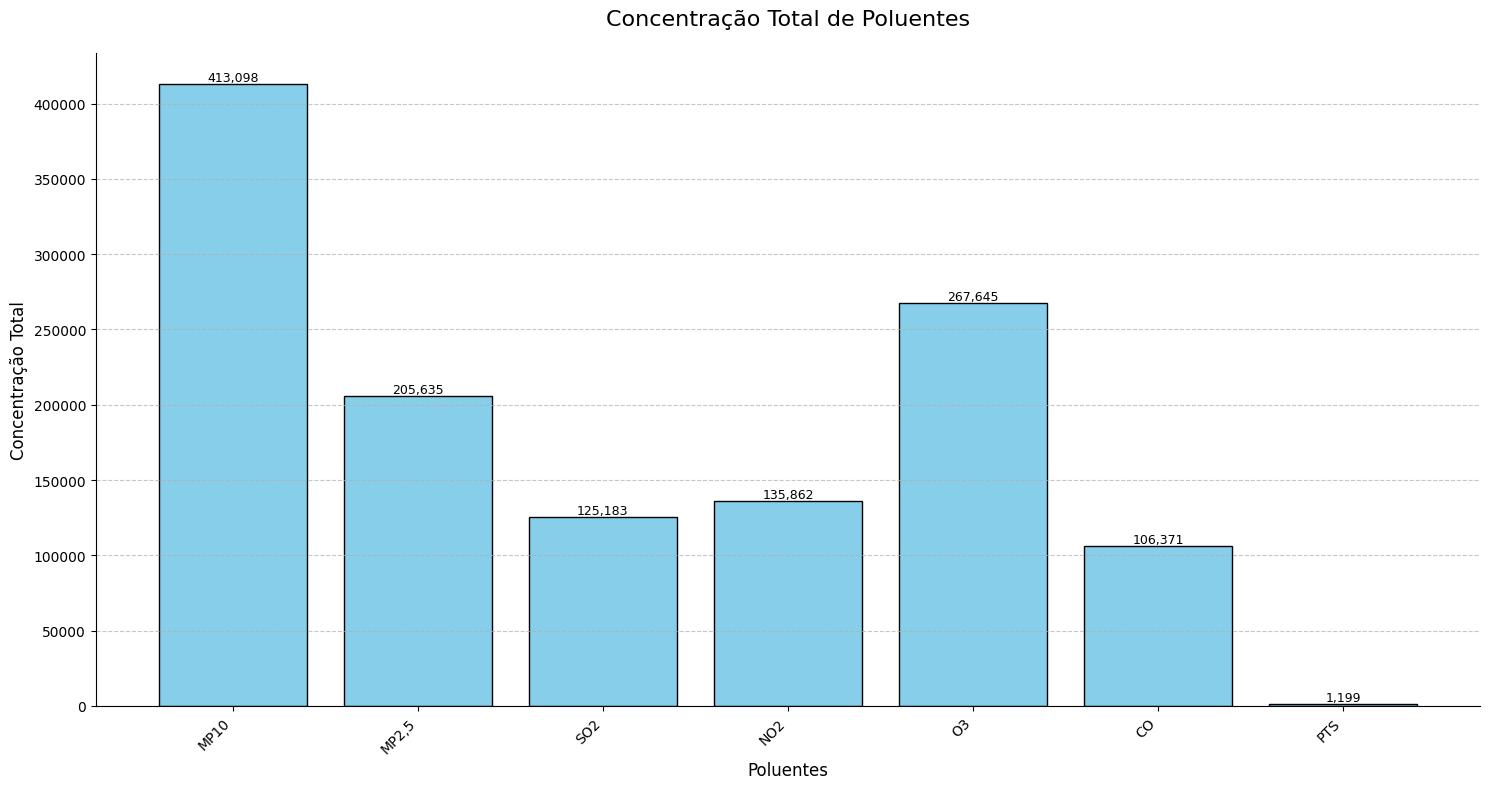

In [262]:
# Ordenar os estados e valores
labels = list(dict_poluentes.keys())
values = list(dict_poluentes.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Concentração Total de Poluentes', fontsize=16, pad=20)
plt.xlabel('Poluentes', fontsize=12)
plt.ylabel('Concentração Total', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

## Se for utilizar, dar um sort pela quantidade de concentração total (melhor visualização)

In [263]:
df_medidas.columns

Index(['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla',
       'concentracao', 'iqar', 'Data'],
      dtype='object')

In [264]:
# Cidades com maiores concentrações
# Concentração total de todos os poluentes
def agrupando_por_poluente_cidade(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['nome_mun']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [265]:
dict_pol_cidade = agrupando_por_poluente_cidade(df_medidas)

In [266]:
dict_pol_cidade_ordenado = dict(sorted(dict_pol_cidade.items(), key=lambda item: item[1], reverse=True))

In [267]:
dict_pol_cidade_ordenado

{'Rio de Janeiro': 134490,
 'São Paulo': 116303,
 "Dias d'Ávila": 86482,
 'Camaçari': 80314,
 'Congonhas': 49553,
 'Vitória': 44132,
 'Vila Velha': 30357,
 'Serra': 28358,
 'Três Lagoas': 27719,
 'Ipatinga': 27530,
 'Itabira': 24660,
 'Belo Horizonte': 22158,
 'São Sebastião do Passé': 20879,
 'Betim': 20468,
 'Campinas': 19997,
 'Barra Longa': 19866,
 'Cubatão': 18999,
 'Timóteo': 18958,
 'São José da Lapa': 16864,
 'Conceição do Mato Dentro': 16172,
 'Guaíba': 15526,
 'Paulínia': 14863,
 'Guarulhos': 14852,
 'Santos': 14522,
 'São José dos Campos': 14213,
 'Rio Doce': 14080,
 'Santo André': 14004,
 'Esteio': 13828,
 'Canoas': 13763,
 'São Bernardo do Campo': 13376,
 'Cariacica': 13011,
 'Paracatu': 11877,
 'Ibirité': 9180,
 'Triunfo': 8995,
 'Brumadinho': 8245,
 'Limeira': 7567,
 'Carapicuíba': 7542,
 'Araçatuba': 7492,
 'Sorocaba': 7485,
 'Presidente Prudente': 7452,
 'Marília': 7428,
 'Catanduva': 7417,
 'Bauru': 7398,
 'Americana': 7380,
 'Taubaté': 7371,
 'Rio Claro': 7353,
 'Tat

In [268]:
top10_cidades = dict(itertools.islice(dict_pol_cidade_ordenado.items(), 10))

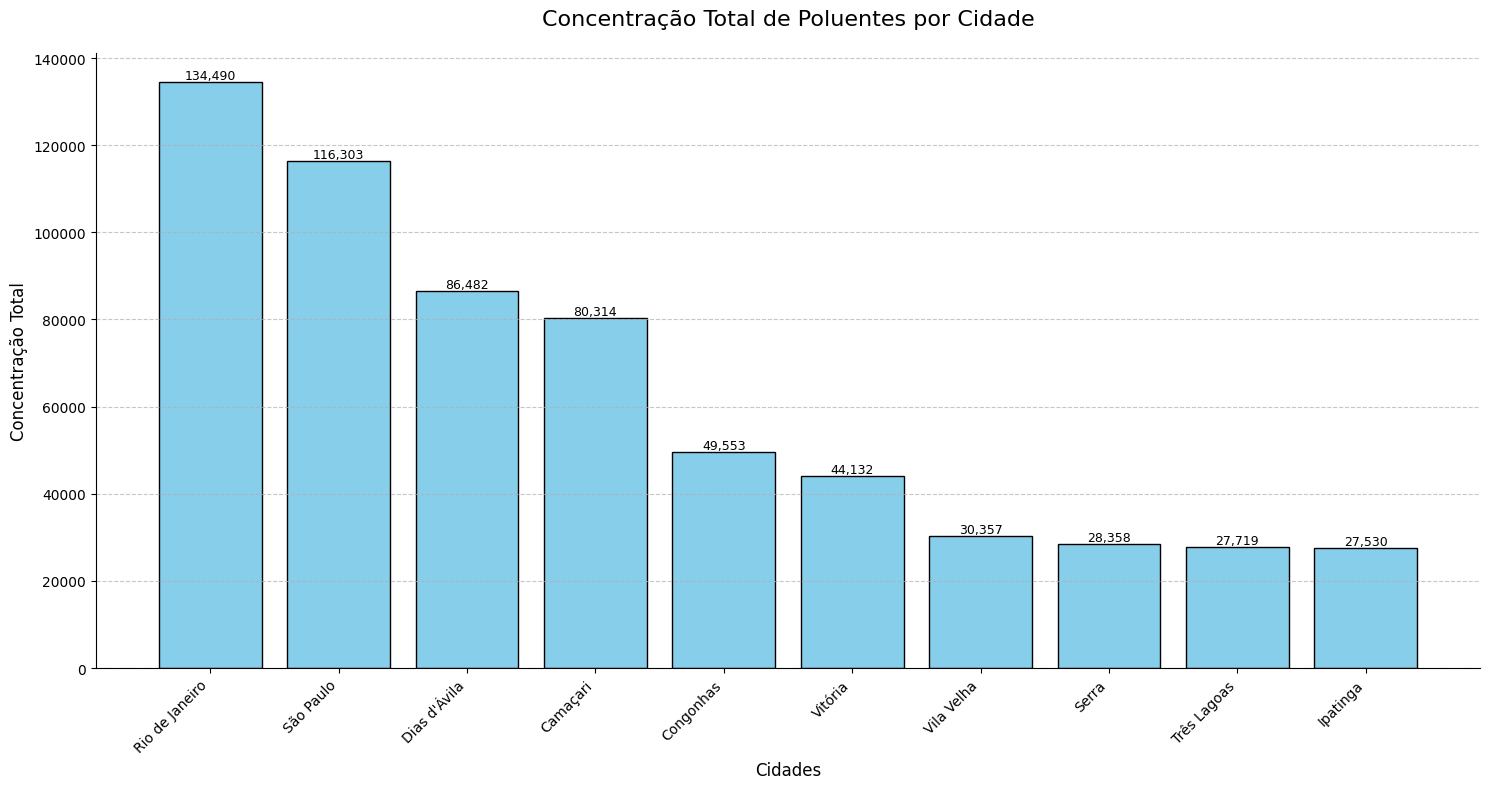

In [269]:
# Ordenar os estados e valores
labels = list(top10_cidades.keys())
values = list(top10_cidades.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Concentração Total de Poluentes por Cidade', fontsize=16, pad=20)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Concentração Total', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()


Análise uti: por faixa etária sexo qualidades ruins de ar/qualidades boas

Fazer análise apenas dos estados: Bahia (BA) Rio de Janeiro (RJ) Minas Gerais (MG) e São Paulo (SP)

Colunas do DataSUS:

NU_NOTIFIC -> Número de notificação

DT_NOTIFIC -> Data de Notificação

DT_SIN_PRI -> Data dos primeiros sintomas

DT_NASC    -> Data de Nascimento

DT_EVOLUCA -> Data de evolução (Óbito ou Alta)

SG_UF      -> Sigla UF

ID_MN_RESI -> Nome da cidade

CS_SEXO    -> Sexo (Masculino/Feminio) 

CS_RACA    -> Raça (Preto, Branco, Indígena)

CS_ESCOL_N -> Nível de escolaridade

FATOR_RISC -> Fatores de Risco

HOSPITAL   -> Houve Internação ?

DT_INTERNA -> Data Internalção

UTI        -> Foi para UTI?

DT_ENTUTI  -> Data de entrada da UTI

DT_SAIDUTI -> Data de Saída da UTI

SUPORT_VEN -> Suporte Ventilarório (sim invasivo/Sim, não invasivo/Não/Ignorado)

CLASSI_FIN -> Classificação Final (Influenza/Covid-19/SRAG por outro vírus/SRAG por outro agente etiológico/SRAG não especificado)

CRITERIO   -> Critério de encerramento (Laboratorial/Clínico Epidemológico/Clínico/Clínico Imagem)

EVOLUCAO   -> Evolução do caso (Cura/Óbito/Óbtio por outras causas/Ignorado)

PUERPERA   -> Puépera (Período pós-parto até 45 dias) 

CARDIOPATI -> Doença Cardiovasculas Crônica

HEMATOLOGI -> Doença Hematológica Crônica

SIND_DOWN  -> Paciente com Sindrome de Down

HEPATICA   -> Doença Hepática Crônica

ASMA       -> Asma

DIABETES   -> Diabetes

NEUROLOGIC -> Doença Neurológica

PNEUMOPATI -> Possui outra doença pneumopatia crônica

IMUNODEPRE -> Possui Imunodeficiência ou Imunodepressão (diminuição da função do sistema imunilógico)

RENAL      -> Possui Doença Renal Crônica

OBESIDADE  -> Possui obesidade

FEBRE      -> Apresentou febre

TOSSE      -> Apresentou Tosse

GARGANTA   -> Apresentou dor na garganta

DISPNEIA   -> Apresentou Dispneia

DESC_RESP  -> Apresentou desconforto respiratório

SATURACAO  -> Apresentou Saturação O2 < 95%

DIARREIA   -> Apresentou Diarreia

VOMITO     -> Apresentou Vômito

FADIGA     -> Apresentou Fadiga

PERD_OLFT  -> Apresentou Perda de Olfato

PERD_PALA  -> Apresentou Perda Paladar

Colunas do MonitorAr:

Colunas das tabelas de medições:

Nome do município

Estado

Nome da Estação

Sigla        -> Sigla do poluente monitorado

Concentração -> Concentração do poluente

IQAR         -> Índice de Qualidade do Ar de acordo com o poluente

Data

Hora

Colunas da tabela de Estações:

Código IBGE do Município

Nome do Município

Estado

ID da estação

Nome da Estação

Status da Estação 

Tipo da Estação

Latitude

Longitude

Por fim, temos uma tabela do Censo 2022, onde contém o estado e a população total por uf em 2022

### Ideias de Análises

- Separar por faixa etária (0-12, 13-21, 22-35, 36-50, 51-65, 66+)

- Calcular média diária do IQAR por cidade:
    - Poluentes chaves: PM2.5, O3 (associados a problemas respiratórios)

- Calcular taxas de internações (utilizando os dados do Censo 2022, população por estado)

- Métricas da Saúde:
    - UTI: Proporção de casos que necessitaram de UTI

    - Sintomas Graves: Dispineia + Saturação < 95%

    - Mortalidade: Proporção de óbitos

- Análises Estratégicas Para a Persona:
    - Efeito da Qualidade do Ar:
        - Visualização: gráfico de dispersão entre IQAR médio e Taxa de UTI por cidade

        - Insight: 'No RJ, dias com IQAR > 80 aumentam em 22% a taxa de internação em UTI em idosos'

    - Grupos Vulnerávies:
        - Faixa Etária: Idosos (>66 anos) têm taxa 3x maior de sintomas graves em dias poluídos

        - Sexo: Homens mostram 30% mais internações por asma em SP durante picos de O3
    
    - Análise Temporal:
        - Sazonalidade: Correlacionar picos de poluição (inverno) com internações por SRAG

        - Eventos: Impacto de queimadas (ex.: 2023 em MG) na saúde respiratória

- Sugestões de Visualização:
    - Dashboard com Campanhas:
        1. Mapa Iterativo:
            - Estados BA/RJ/SP/MG com cores ela média do IQAR

            - Camada: Taxa de mortalidade por SRAG (tamanho dos marcadores)
        
        2. Gráficos de Barras
            - Eixo X: Faixa Etária 

            - Eixo Y: % de casos com UTI

            - Cores: dias com ar bom (verde) vs. ruim (vermelho)

        3. Série Temporal:
            - Linha 1: Média móvel de PM2.5 (últimos 30 dias)
            - Linha 2: Casos de dispneia (por 100k habitantes)

- Recomendações para a Persona:
    - Foco em Grupos Vulneráveis: campanhas para idosos e crianças em dias com IQAR > 80

    - Dados Locais: comparar capitais (ex.: SP tem 2x mais internações por poluição do q BA)

    - Causa-Efeito: dias com O3 > 100 ug/m3 aumentam em 40% as internações por asma em mulheres > 50 anos

    - Advocacy: usar gráficos de impacto em reuniões com prefeituras (ex.: custos da poluição na saúde pública)

- Fontes do Insight:
    - Poluente PM2.5: Associado a 85% dos casos de SRAG em dias poluídos

    - Gênero: Homens têm maior taxa de internação, mas mulheres mostram mais sintomas crônicos

#### Lista de Poluentes e O Que Afetam

1. Material Particulado <= 2.5um (MP2.5): 
    - Penetra os alvéolos pulmonares, causa inflamação, agrava a asma, DPOC e câncer de pulmão

2. Material Particulado <= 10um (MP10):
    - Irrita vias aéreas, desencadeia bronquite e redução da função pulmonar

3. Ozônio (O3):
    - Provoca danos oxidativos, tosse, dor torácia e piora de doenças respiratórias crônicas 

4. Dióxido de Nitrogênio (NO2):
    - Aumenta risco infecções respiratórias e reduz capacidade pulmonar em crianças

5. Dióxido de Enxofre (SO2):
    - Causa broncoconstrição, especialmente em asmáticos

6. Monóxido de Carbono (CO):
    - Reduz a oxigenação sanguínea, agrava insuficiência respiratória

7. Benzeno (BEN):
    - Composto carcinogênico associado a leucemia e danos à medula óssea

8. Formaldeído (FORMAL):
    - Irritante das vias aéreas, potencial carcinogênico respiratório

9. Fumaça (FMC):
    - Contém MP2.5 e compostos tóxicos que agravam doenças pulmonares

10. Benzeno/Tolueno/Etil-Benzeno/Xileno (BTEX): 
    - Compostos voláteis irritantes com efeitos sinérgicos

11. Gás Sulfídrico (H2S):
    - Irrita mucosas respiratórias mesmo em baixas concentrações

12. Amônia (NH3):
    - Forma partículas secundárias (ex.: nitrato de amônio) que penetram nos pulmões

##### Recomendações

- Focar apenas em: MP2.5, MP10, O3, NO2, CO e BEN

- Métricas de exposição:
    - Média diária de MP2.5 e O3

    - Número de dias/ano com IQAR > 80 (classificação "RUIM")

- Correlação com Sintomas:
    - Cruzar picos de sintomas com:
        - Dispineia: falta de ar

        - Saturação < 95
        
        - Internações por ASMA  ou PNEUMOPATIA

- Grupos Vulneráveis 
    - Analisar separadamente:
        - Crianças (0-12) e Idosos (66+)

        - Portadores de ASMA, PNEUMOPATIA ou OBESIDADE

- Exemplo de Insight Útil:
    - *"Dias com MP₂.₅ > 25 μg/m³ (acima do limite da OMS) aumentam em 40% as internações por asma infantil em São Paulo."*

##### Métricas de Qualidades do Ar:

* 0 - 40: BOA

* 41 - 80: MODERADA

* 81 - 120: RUIM

* 121 - 200: MUITO RUIM

* +200: PÉSSIMA
